In [14]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy 
from scipy.stats import probplot
import matplotlib.pyplot as plt
from scipy.stats import logistic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from scipy.spatial.distance import cosine, correlation
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Perceptron

In [15]:
df  = pd.read_csv('/Users/hiteshbhatia/Downloads/chs2018_public.csv')

**Pre Processing the Data**
We will first proceed with doing the analysis on the HIV Testing. We will be analysing the HIV with the general health as the target variable.

In [16]:
hiv_df = df[['cid','hiv12months18','everhivtest18','generalhealth']]
#Checking the null values
hiv_df.isnull().sum()

cid                0
hiv12months18    246
everhivtest18    319
generalhealth     46
dtype: int64

In [17]:
#Dropping all the columns having the Null values
hiv_df = hiv_df.dropna()
hiv_df.describe()

,cid,hiv12months18,everhivtest18,generalhealth
count,9.570000e+03,9570.000000,9570.000000,9570.000000
mean,1.908633e+06,1.677952,1.355590,2.748694
std,5.598017e+03,0.467286,0.478717,1.123412
min,1.900001e+06,1.000000,1.000000,1.000000
25%,1.902537e+06,1.000000,1.000000,2.000000
50%,1.911012e+06,2.000000,1.000000,3.000000
75%,1.913530e+06,2.000000,2.000000,4.000000
max,1.916027e+06,2.000000,2.000000,5.000000


In [18]:
corr_1 = hiv_df.corr()
corr_1

,cid,hiv12months18,everhivtest18,generalhealth
cid,1.000000,-0.164585,-0.202607,-0.102562
hiv12months18,-0.164585,1.000000,0.511982,0.006664
everhivtest18,-0.202607,0.511982,1.000000,0.039679
generalhealth,-0.102562,0.006664,0.039679,1.000000


It seems like the variable **hiv12months18** (Have you had an HIV test in the last 12 months?) is very less correlated and thus can be dropped.

# Prediction / RMSE

In [19]:
#[1]https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
#[2]https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.random_projection import sparse_random_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from math import sqrt

#function for rmse calculation of model
def model_apply(x,y,algo,n):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(x_train)
    # Apply transform to both the training set and the test set.
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    pca = PCA(n_components=n,tol=.95)
    pca.fit(x_test)
    print(pca.explained_variance_ratio_) 
    
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    
#     principalDf = pd.DataFrame(data = x_train
#              , columns = ['pc1', 'pc2','pc3'])
#     print(principalDf)

    #model selection
    if algo==1:
        model=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200)
    elif algo==2:
        model=GaussianNB()
    elif algo==3:
        model=DecisionTreeClassifier()
    elif algo==4:
        model=svm.SVC(gamma='scale')
    elif algo==5:
        model=Perceptron(tol=1e-3, random_state=0)
        
        # Train the model using the training sets
    model.fit(x_train,y_train.values.ravel())

    # Predict Output
    y_pred = model.predict(x_test)
    print ("Predicted Value:", y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    return(rmse)

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [20]:
#preparing training and test data
x=hiv_df[["everhivtest18"]] 
y=hiv_df[["generalhealth"]] 

In [21]:
model_apply(x,y,1,1)

[1.]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.30296698704554953
[[  0   0 370   0   0]
 [  0   0 636   0   0]
 [  0   0 725   0   0]
 [  0   0 514   0   0]
 [  0   0 148   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       370
         2.0       0.00      0.00      0.00       636
         3.0       0.30      1.00      0.47       725
         4.0       0.00      0.00      0.00       514
         5.0       0.00      0.00      0.00       148

    accuracy                           0.30      2393
   macro avg       0.06      0.20      0.09      2393
weighted avg       0.09      0.30      0.14      2393



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1603564447963217

**Analysing the Immunization Data**

In [22]:
imm_df = df[['cid','fluvaccineshot','hepbvaccine18','generalhealth']]
imm_df.isnull().sum()

cid                0
fluvaccineshot    60
hepbvaccine18     12
generalhealth     46
dtype: int64

In [23]:
imm_df = imm_df.dropna()
imm_df.describe()

,cid,fluvaccineshot,hepbvaccine18,generalhealth
count,9.965000e+03,9965.000000,9965.000000,9965.000000
mean,1.908600e+06,1.496739,1.666131,2.754441
std,5.602988e+03,0.500014,0.677995,1.127470
min,1.900001e+06,1.000000,1.000000,1.000000
25%,1.902524e+06,1.000000,1.000000,2.000000
50%,1.910991e+06,1.000000,2.000000,3.000000
75%,1.913511e+06,2.000000,2.000000,4.000000
max,1.916027e+06,2.000000,3.000000,5.000000


In [24]:
corr_2 = imm_df.corr()
corr_2

,cid,fluvaccineshot,hepbvaccine18,generalhealth
cid,1.000000,0.114555,-0.103614,-0.102591
fluvaccineshot,0.114555,1.000000,0.055553,-0.070049
hepbvaccine18,-0.103614,0.055553,1.000000,0.069193
generalhealth,-0.102591,-0.070049,0.069193,1.000000


The variable fluvaccineshot (During the past 12 months, have you had a flu shot in your arm or a flu vaccine that was sprayed in your nose?) is negatively correlated with the general health and thus we can drop this feature.

In [25]:
#preparing training and test data
x=imm_df[["hepbvaccine18"]] 
y=imm_df[["generalhealth"]] 

In [28]:
model_apply(x,y,1,1)

[1.]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.3089887640449438
[[  0   0 373   0   0]
 [  0   0 694   0   0]
 [  0   0 770   0   0]
 [  0   0 520   0   0]
 [  0   0 135   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       373
         2.0       0.00      0.00      0.00       694
         3.0       0.31      1.00      0.47       770
         4.0       0.00      0.00      0.00       520
         5.0       0.00      0.00      0.00       135

    accuracy                           0.31      2492
   macro avg       0.06      0.20      0.09      2492
weighted avg       0.10      0.31      0.15      2492



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1413011076392396

**Analysing the Sexual Behavior**

In [29]:
sex_df = df[['cid','sexbehav_active18','imputed_sexuallyactive18','imputed_sexpartner','wsw','wswexclusive','msm','msmexclusive','condom18','condomusetrend','analsex','analsexcondomuse18','bthcntrltype18','bthcontrollastsex18','pcpsexhistory','everheardofprep','everusedprep18','generalhealth']]
sex_df.isnull().sum()

cid                            0
sexbehav_active18           4316
imputed_sexuallyactive18      56
imputed_sexpartner            56
wsw                         7264
wswexclusive                7246
msm                         7157
msmexclusive                7153
condom18                    4463
condomusetrend              5439
analsex                     4469
analsexcondomuse18          9581
bthcntrltype18              6303
bthcontrollastsex18         6301
pcpsexhistory                308
everheardofprep             4344
everusedprep18              8119
generalhealth                 46
dtype: int64

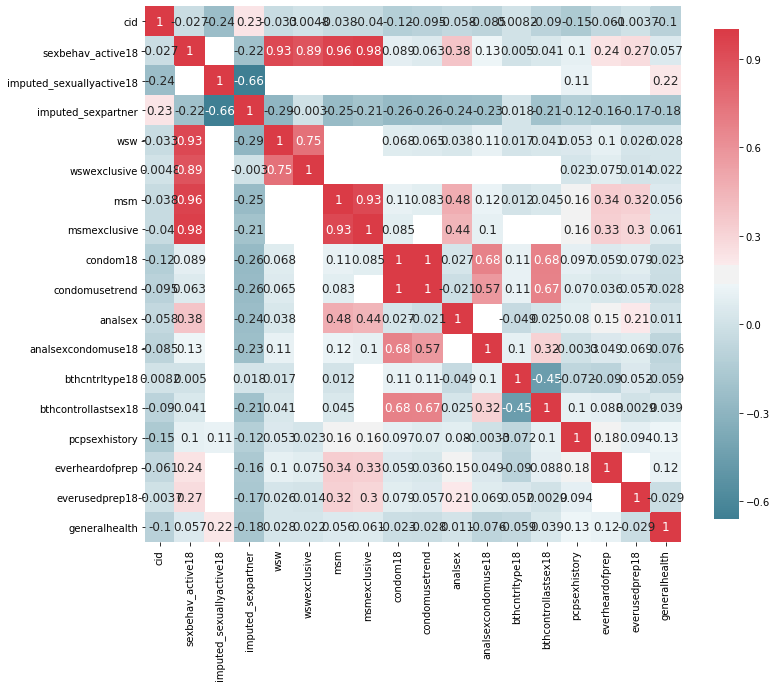

In [30]:
plot_correlation_map(sex_df)

Among all the features in the Sexual Behavior, only 3 features looks useful to me. **imputed_sexuallyactive18**(Sexually active in past 12 months), **imputed_sexpartner** (Number of male and female sex partners in the past 12 months) and **pcpsexhistory** (Thinking about the last time you visited your personal doctor or health care provider, did he or she ask you any questions about your sexual history?).

In [31]:
sex_df = df[['cid','imputed_sexuallyactive18','imputed_sexpartner','pcpsexhistory','generalhealth']]
sex_df.isnull().sum()


cid                           0
imputed_sexuallyactive18     56
imputed_sexpartner           56
pcpsexhistory               308
generalhealth                46
dtype: int64

In [32]:
sex_df_f = sex_df.dropna()
sex_df_f.describe()

,cid,imputed_sexuallyactive18,imputed_sexpartner,pcpsexhistory,generalhealth
count,9.728000e+03,9728.000000,9728.000000,9728.000000,9728.000000
mean,1.908610e+06,1.370683,1.852899,1.645662,2.761308
std,5.605550e+03,0.483012,0.865031,0.478337,1.123950
min,1.900001e+06,1.000000,1.000000,1.000000,1.000000
25%,1.902527e+06,1.000000,1.000000,1.000000,2.000000
50%,1.910992e+06,1.000000,2.000000,2.000000,3.000000
75%,1.913526e+06,2.000000,2.000000,2.000000,4.000000
max,1.916026e+06,2.000000,4.000000,2.000000,5.000000


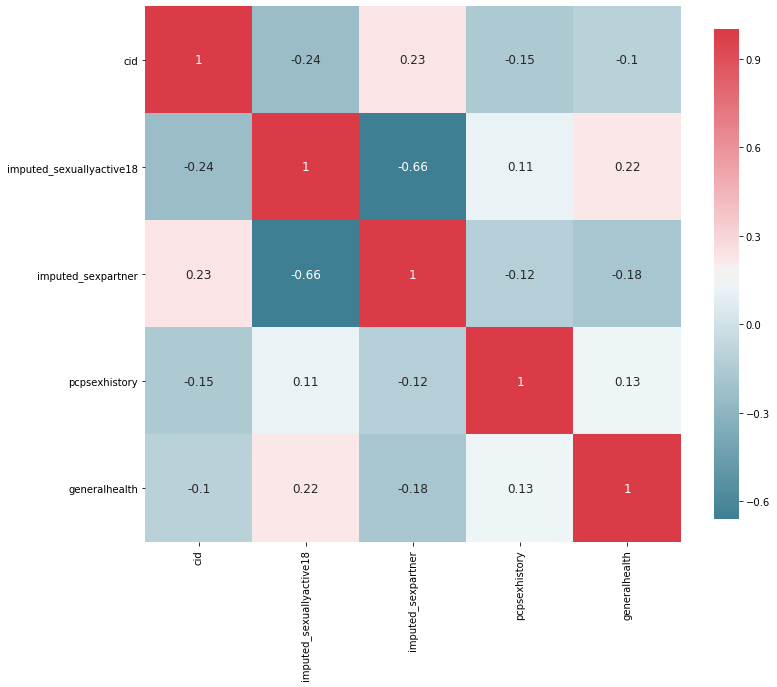

In [33]:
plot_correlation_map(sex_df)

Let us use the above 3 features to predict the general health.

In [34]:
#preparing training and test data
x=sex_df_f[['imputed_sexuallyactive18','imputed_sexpartner','pcpsexhistory']] 
y=sex_df_f[["generalhealth"]] 

In [37]:
model_apply(x,y,1,3)

[0.57328918 0.31532876 0.11138206]
Predicted Value: [3. 3. 2. ... 3. 3. 2.]
Accuracy: 0.3100328947368421
[[  0 135 174  53   0]
 [  0 203 313 101   0]
 [  0 254 376 214   0]
 [  0  80 216 175   0]
 [  0  20  51  67   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       362
         2.0       0.29      0.33      0.31       617
         3.0       0.33      0.45      0.38       844
         4.0       0.29      0.37      0.32       471
         5.0       0.00      0.00      0.00       138

    accuracy                           0.31      2432
   macro avg       0.18      0.23      0.20      2432
weighted avg       0.25      0.31      0.27      2432



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.196211123770206

**Analysing the Cancer Screening Data**

In [38]:
cancer_df = df[['cid','evercolon18','colonoscopy10yr18','evercolon18_45','colonoscopy10yr_45','fobt18','fobt18_45','lastfobt18','fobt1yr18','fobt2yr18','lastfobt18_45','fobt1yr18_45','fobt2yr18_45','generalhealth']]
cancer_df.isnull().sum()

cid                      0
evercolon18           4680
colonoscopy10yr18     4724
evercolon18_45        3806
colonoscopy10yr_45    3855
fobt18                4761
fobt18_45             3890
lastfobt18            4811
fobt1yr18             4811
fobt2yr18             4811
lastfobt18_45         3944
fobt1yr18_45          3944
fobt2yr18_45          3944
generalhealth           46
dtype: int64

Most of the features in Cancer Screening have a huge amount of Null values, thus we skip this for our Analysis.

# Clubbing it All together

In [39]:
club_df = df[['cid','hiv12months18','everhivtest18','everhivtest18','imputed_sexuallyactive18','imputed_sexpartner','pcpsexhistory','hepbvaccine18','generalhealth']]
club_df.isnull().sum()

cid                           0
hiv12months18               246
everhivtest18               319
everhivtest18               319
imputed_sexuallyactive18     56
imputed_sexpartner           56
pcpsexhistory               308
hepbvaccine18                12
generalhealth                46
dtype: int64

In [40]:
club_df = club_df.dropna()
club_df.describe()

,cid,hiv12months18,everhivtest18,everhivtest18,imputed_sexuallyactive18,imputed_sexpartner,pcpsexhistory,hepbvaccine18,generalhealth
count,9.293000e+03,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,9293.00000
mean,1.908637e+06,1.673948,1.352846,1.352846,1.366728,1.859787,1.640805,1.651028,2.75530
std,5.599819e+03,0.468792,0.477881,0.477881,0.481937,0.867472,0.479790,0.667111,1.12152
min,1.900001e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,1.902542e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000
50%,1.911007e+06,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.00000
75%,1.913539e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.00000
max,1.916026e+06,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.000000,5.00000


In [43]:
#preparing training and test data
x=club_df[['everhivtest18','imputed_sexuallyactive18','imputed_sexpartner','pcpsexhistory','hepbvaccine18']]
#x=club_df[['hepbvaccine18']]
y=club_df[["generalhealth"]] 

In [45]:
model_apply(x,y,1,1)

[0.41515044]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.3287435456110155
[[  0  12 328   0   0]
 [  0  26 594   0   0]
 [  0  29 738   0   0]
 [  0   6 445   0   0]
 [  0   5 141   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       340
         2.0       0.33      0.04      0.07       620
         3.0       0.33      0.96      0.49       767
         4.0       0.00      0.00      0.00       451
         5.0       0.00      0.00      0.00       146

    accuracy                           0.33      2324
   macro avg       0.13      0.20      0.11      2324
weighted avg       0.20      0.33      0.18      2324



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1408922437619058

**Correlating Number of Sex Partners with the HIV**

In [113]:
hiv_sp_df = df[['everhivtest18','imputed_sexpartner']]
hiv_sp_df.isnull().sum()

everhivtest18         319
imputed_sexpartner     56
dtype: int64

In [114]:
hiv_sp_df = hiv_sp_df.dropna()
hiv_sp_df.describe()

,everhivtest18,imputed_sexpartner
count,9706.000000,9706.000000
mean,1.353596,1.864517
std,0.478110,0.873258
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,2.000000
max,2.000000,4.000000


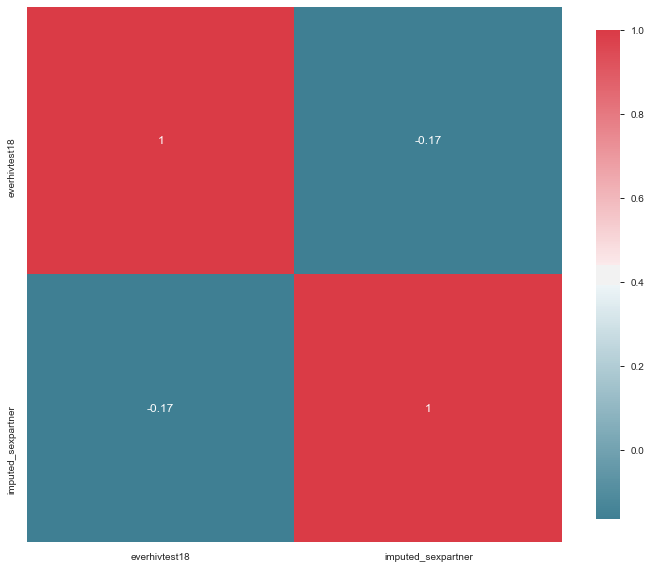

In [115]:
plot_correlation_map(hiv_sp_df)

In [116]:
#preparing training and test data
x=hiv_sp_df[["everhivtest18"]] 
y=hiv_sp_df[["imputed_sexpartner"]] 

In [117]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [2. 2. 1. ... 2. 1. 2.]
Accuracy: 0.5249278945199836
[[445 468   0   0]
 [333 829   0   0]
 [ 35 101   0   0]
 [ 60 156   0   0]]
              precision    recall  f1-score   support

         1.0       0.51      0.49      0.50       913
         2.0       0.53      0.71      0.61      1162
         3.0       0.00      0.00      0.00       136
         4.0       0.00      0.00      0.00       216

    accuracy                           0.52      2427
   macro avg       0.26      0.30      0.28      2427
weighted avg       0.45      0.52      0.48      2427



0.9533840147191706

In [ ]:
1=Yes 3,452 2=No 6,316 .d=Don’t know 161 .r=Refused 91 . =Missing/Not asked 50